In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-03--16h-33m-47s',
 '2025-06-03--16h-35m-37s',
 '2025-06-03--16h-37m-20s',
 '2025-06-03--16h-39m-05s',
 '2025-06-03--16h-40m-50s',
 '2025-06-03--16h-42m-36s',
 '2025-06-03--16h-44m-21s',
 '2025-06-03--16h-46m-06s',
 '2025-06-03--16h-47m-52s',
 '2025-06-03--16h-49m-39s',
 '2025-06-03--16h-51m-26s',
 '2025-06-03--16h-53m-14s',
 '2025-06-03--16h-54m-59s',
 '2025-06-03--16h-56m-47s',
 '2025-06-03--16h-58m-36s',
 '2025-06-03--17h-00m-23s',
 '2025-06-03--17h-02m-09s',
 '2025-06-03--17h-03m-56s',
 '2025-06-03--17h-05m-43s',
 '2025-06-03--17h-07m-28s',
 '2025-06-03--17h-09m-15s',
 '2025-06-03--17h-11m-02s',
 '2025-06-03--17h-12m-49s',
 '2025-06-03--17h-14m-36s',
 '2025-06-03--17h-16m-22s',
 '2025-06-03--17h-18m-08s',
 '2025-06-03--17h-19m-55s',
 '2025-06-03--17h-21m-56s',
 '2025-06-03--17h-23m-44s',
 '2025-06-03--17h-25m-29s',
 '2025-06-03--17h-27m-14s',
 '2025-06-03--17h-29m-01s',
 '2025-06-03--17h-30m-48s',
 '2025-06-03--17h-32m-37s',
 '2025-06-03--17h-34m-23s',
 '2025-06-03--17h-36

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi
0,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
1,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
2,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000
3,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000
4,2025-06-03--16h-33m-47s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3795413,2025-06-03--20h-24m-15s,97.0,55.0,45.0,3.0,200.0,NaN,1.520775,1.396713,1.570796,1.570796
3795414,2025-06-03--20h-24m-15s,111.0,43.0,44.0,2.0,200.0,NaN,1.575796,1.437363,1.570796,1.570796
3795415,2025-06-03--20h-24m-15s,81.0,71.0,43.0,5.0,200.0,NaN,1.430335,1.327275,1.570796,1.570796
3795416,2025-06-03--20h-24m-15s,102.0,49.0,46.0,3.0,200.0,NaN,1.555796,1.400950,1.570796,1.570796


# Load Theory Curves

In [31]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [32]:
delta_phi_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats.csv'))
delta_phi_theory

,delta_phi,theta,n,delta_phi_estimator_mean,delta_phi_estimator_variance
0,0.000000,0.785398,40,0.000000,0.000000
1,0.003142,0.785398,40,0.000031,0.000010
2,0.006283,0.785398,40,0.000126,0.000041
3,0.009425,0.785398,40,0.000283,0.000092
4,0.012566,0.785398,40,0.000503,0.000164
...,...,...,...,...,...
7510,1.558230,1.570796,200,1.569223,0.000156
7511,1.561372,1.570796,200,1.569909,0.000088
7512,1.564513,1.570796,200,1.570402,0.000039
7513,1.567655,1.570796,200,1.570698,0.000010


# Theta

In [7]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: round(x / 40) * 40)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,40
1,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,40
2,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000,40
3,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000,40
4,2025-06-03--16h-33m-47s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
3795413,2025-06-03--20h-24m-15s,97.0,55.0,45.0,3.0,200.0,NaN,1.520775,1.396713,1.570796,1.570796,200
3795414,2025-06-03--20h-24m-15s,111.0,43.0,44.0,2.0,200.0,NaN,1.575796,1.437363,1.570796,1.570796,200
3795415,2025-06-03--20h-24m-15s,81.0,71.0,43.0,5.0,200.0,NaN,1.430335,1.327275,1.570796,1.570796,200
3795416,2025-06-03--20h-24m-15s,102.0,49.0,46.0,3.0,200.0,NaN,1.555796,1.400950,1.570796,1.570796,200


In [8]:
theta_estimates = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.231673,0.145613,0.021203,39962,1.509035,0.251413,0.063208
1,40.0,0.125664,0.256834,0.143746,0.020663,39654,1.392159,0.398743,0.158996
2,40.0,0.251327,0.328065,0.136421,0.018611,39946,1.164727,0.515477,0.265717
3,40.0,0.376991,0.425206,0.124839,0.015585,39848,1.023079,0.517155,0.267449
4,40.0,0.502655,0.530838,0.118310,0.013997,39757,0.942303,0.508176,0.258242
...,...,...,...,...,...,...,...,...,...
265,535084.5,0.376991,0.438517,NaN,NaN,1,0.927283,NaN,NaN
266,535529.0,0.502655,0.539309,NaN,NaN,1,0.862784,NaN,NaN
267,535648.0,0.785398,0.809501,NaN,NaN,1,0.394541,NaN,NaN
268,535915.0,1.005310,1.011764,NaN,NaN,1,0.315372,NaN,NaN


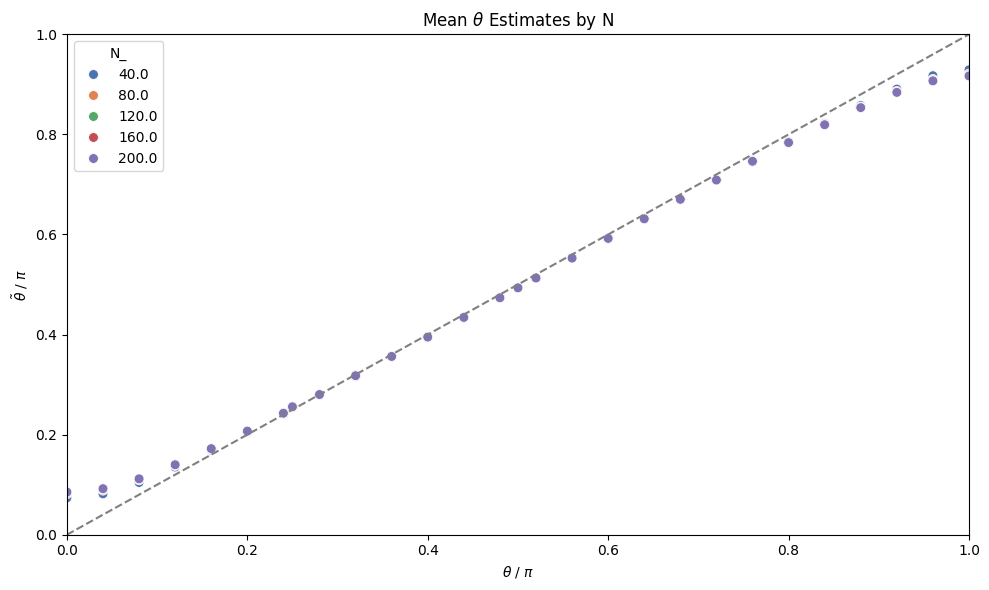

In [9]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

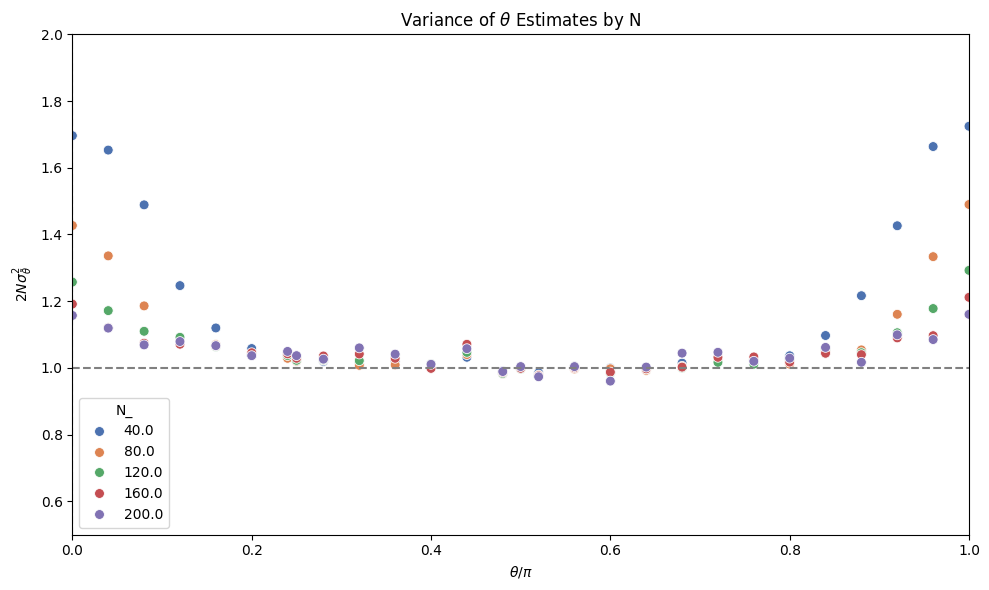

In [10]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

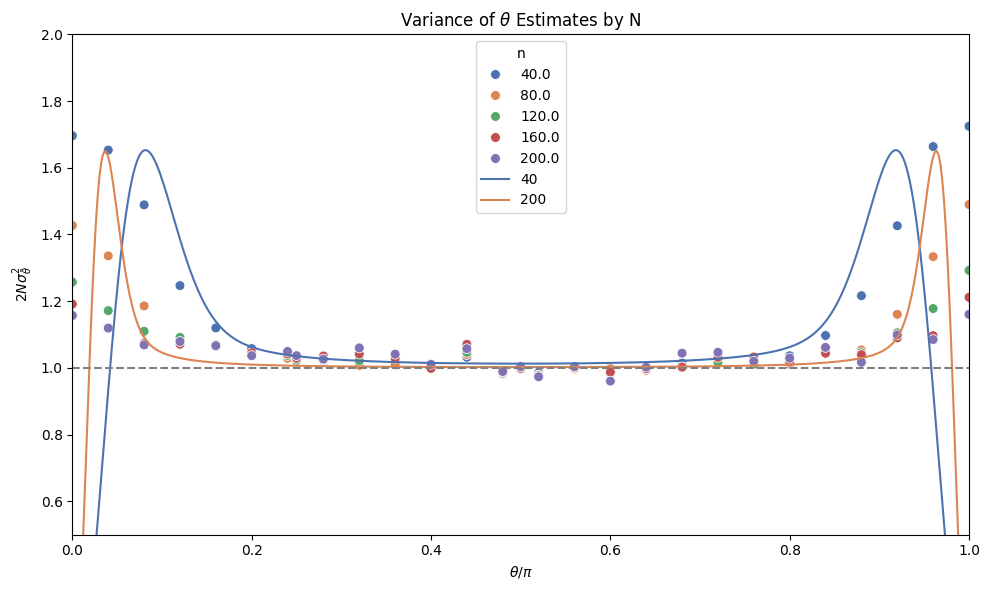

In [11]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette="deep",
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

# Delta Phi

In [22]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,1.514158,0.236302,0.055839,13312,0.236589,0.144774,0.020959
1,40.0,0.000000,0.785398,1.507474,0.256257,0.065668,13252,0.230155,0.146426,0.021440
2,40.0,0.000000,1.570796,1.505375,0.261213,0.068232,13398,0.228290,0.145519,0.021176
3,40.0,0.125664,0.000000,1.277869,0.478832,0.229280,13000,0.263639,0.143797,0.020678
4,40.0,0.125664,0.785398,1.391591,0.399938,0.159951,13318,0.254272,0.143000,0.020449
...,...,...,...,...,...,...,...,...,...,...
775,535084.5,0.376991,0.785398,0.927283,NaN,NaN,1,0.438517,NaN,NaN
776,535529.0,0.502655,0.785398,0.862784,NaN,NaN,1,0.539309,NaN,NaN
777,535648.0,0.785398,0.188496,0.394541,NaN,NaN,1,0.809501,NaN,NaN
778,535915.0,1.005310,0.000000,0.315372,NaN,NaN,1,1.011764,NaN,NaN


#### Theta = pi/2

In [13]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
0,40.0,1.570796,0.000000,0.224786,0.148844,0.022155,13173
1,40.0,1.570796,0.062832,0.228165,0.149079,0.022224,13185
2,40.0,1.570796,0.125664,0.243291,0.147388,0.021723,13110
3,40.0,1.570796,0.188496,0.272814,0.145747,0.021242,13152
4,40.0,1.570796,0.251327,0.311629,0.141449,0.020008,13097
...,...,...,...,...,...,...,...
151,526085.5,1.570796,0.314159,0.378659,NaN,NaN,1
152,526462.0,1.570796,0.376991,0.423933,NaN,NaN,1
153,526897.5,1.570796,0.188496,0.306162,NaN,NaN,1
154,527198.0,1.570796,0.000000,0.267091,NaN,NaN,1


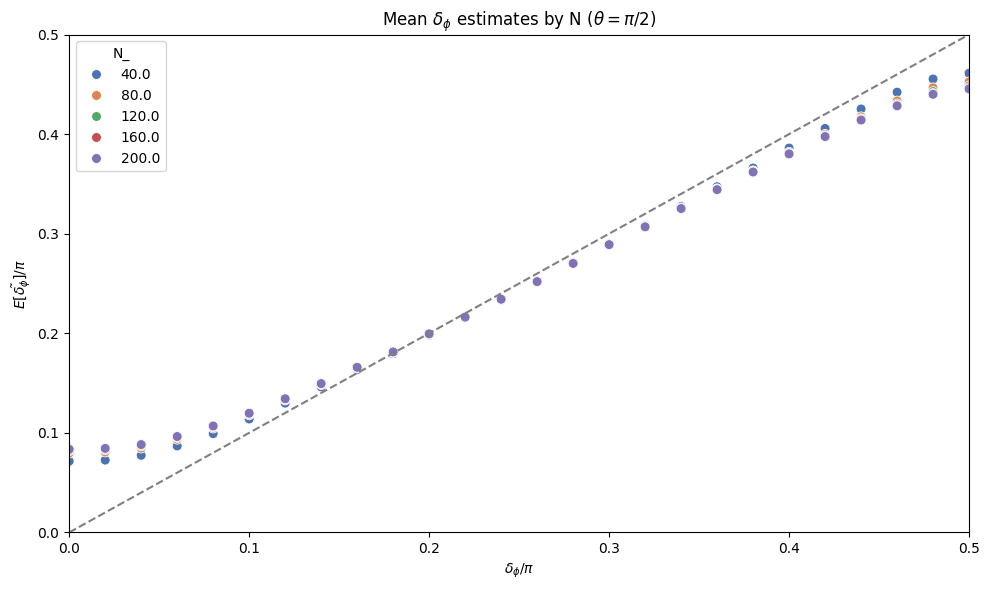

In [14]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

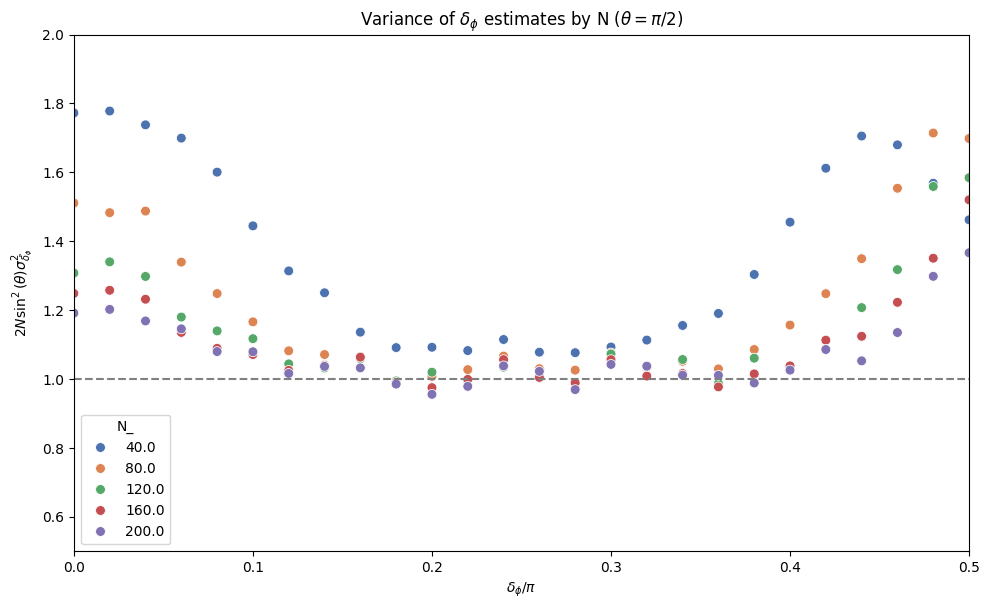

In [15]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_704973/1700585810.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


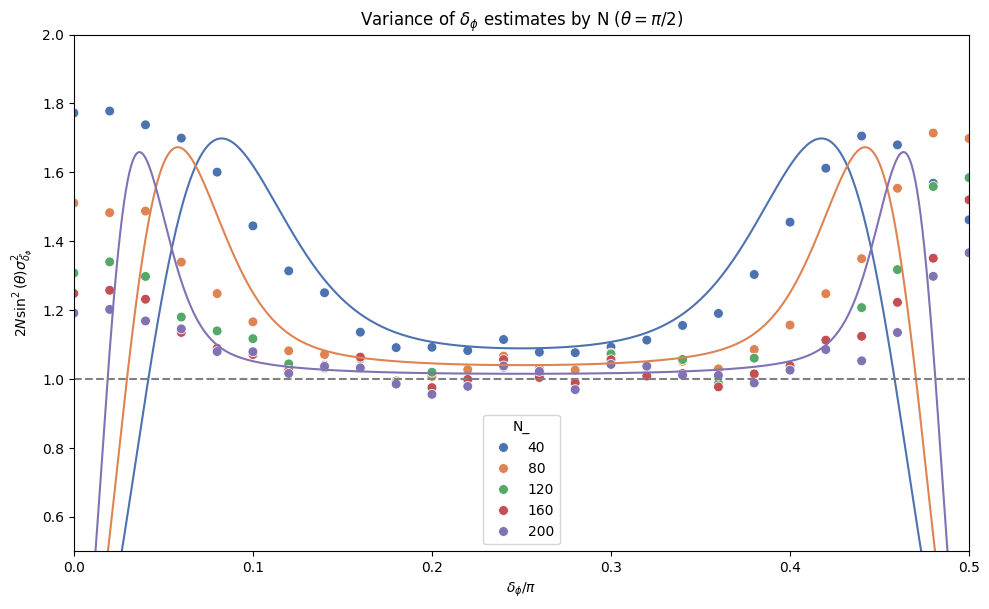

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Can be different subset
][delta_phi_theory["theta"] == np.pi / 2]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [38]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
21,40.0,0.785398,0.000000,0.316620,0.207804,0.043183,13345,0.807362,0.111786,0.012496
22,40.0,0.785398,0.062832,0.312703,0.207786,0.043175,13318,0.807679,0.112317,0.012615
23,40.0,0.785398,0.125664,0.322633,0.208236,0.043362,13330,0.804380,0.113141,0.012801
24,40.0,0.785398,0.188496,0.342265,0.209337,0.043822,13396,0.803876,0.112059,0.012557
25,40.0,0.785398,0.251327,0.371944,0.206479,0.042634,13340,0.805730,0.111598,0.012454
...,...,...,...,...,...,...,...,...,...,...
768,533126.5,0.785398,0.125664,0.377081,NaN,NaN,1,0.810380,NaN,NaN
770,533183.0,0.785398,0.251327,0.418319,NaN,NaN,1,0.810913,NaN,NaN
772,533471.0,0.785398,0.000000,0.373576,NaN,NaN,1,0.812710,NaN,NaN
773,533665.0,0.785398,0.314159,0.448262,NaN,NaN,1,0.808066,NaN,NaN


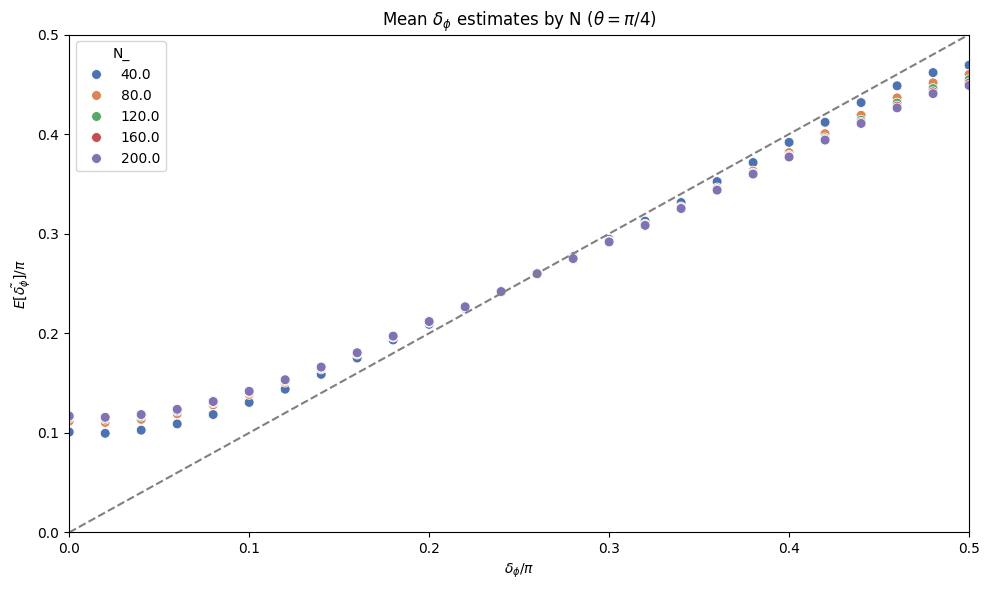

In [39]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

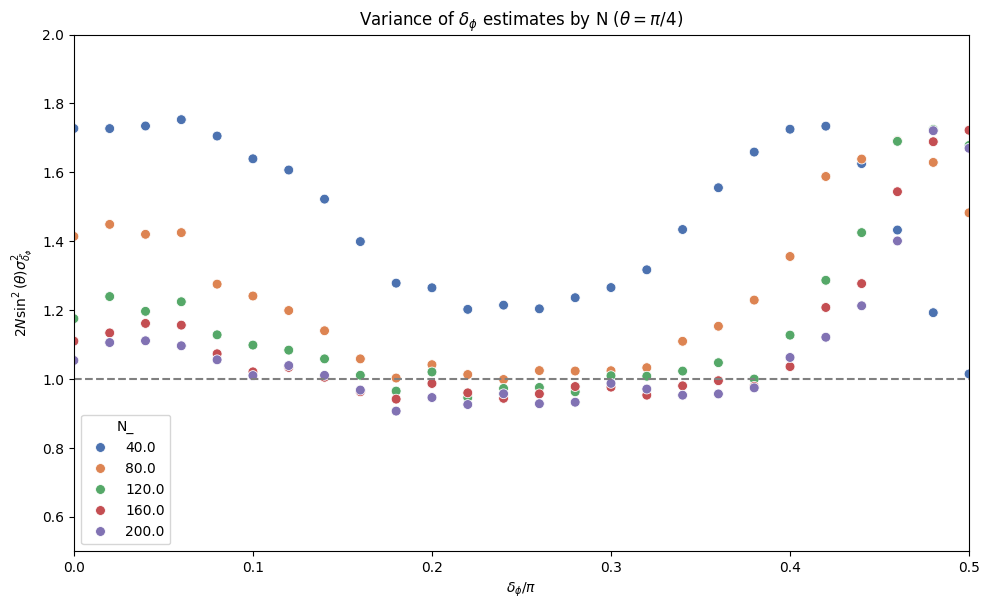

In [40]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[delta_phi_estimates_theta_pi_over_4["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_4["N_"] * np.sin(delta_phi_estimates_theta_pi_over_4["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_704973/833627669.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


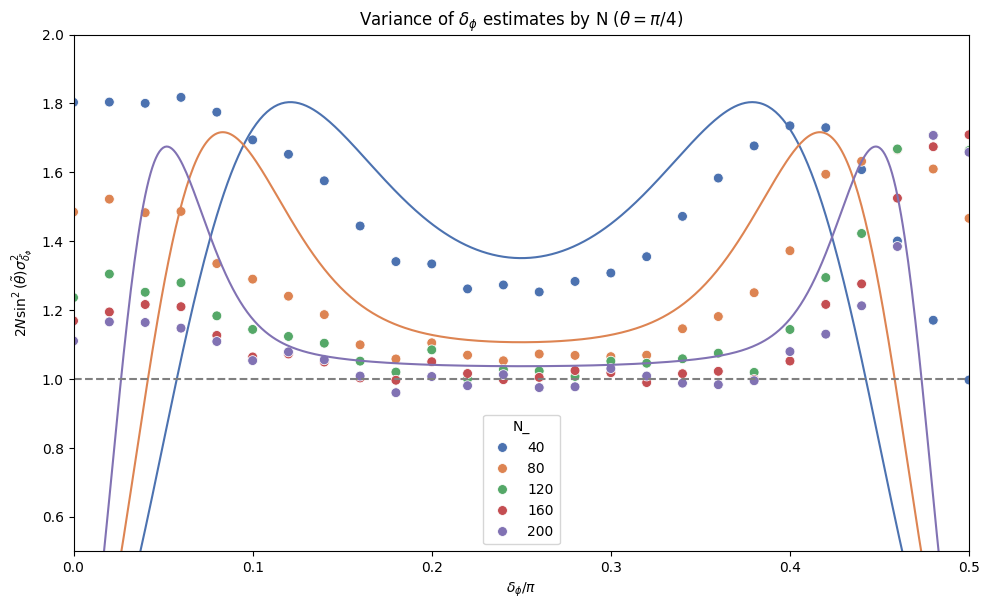

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Adjust if needed
][delta_phi_theory["theta"] == np.pi * 0.25]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"] * 2 * data_filtered["N_"] * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"] * 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) **2, #* 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$")

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png"
)
plt.savefig(file_name, dpi=300)
plt.show()


In [42]:
data_filtered.groupby("N_").agg({
    "theta_estimate_mean": ["mean", "std", "var"],
})

theta_estimate_mean                    
                     mean       std       var
N_                                           
40.0             0.798197  0.011480  0.000132
80.0             0.801365  0.011386  0.000130
120.0            0.802394  0.011346  0.000129
160.0            0.802898  0.011333  0.000128
200.0            0.803203  0.011322  0.000128